In [2]:
!pip install wfdb

  Obtaining dependency information for wfdb from https://files.pythonhosted.org/packages/ce/00/b83d0bd64384455dbc1f8eccb7b5d6dac23728515a9d4d74aa4def6c6fe4/wfdb-4.1.2-py3-none-any.whl.metadata
  Using cached wfdb-4.1.2-py3-none-any.whl.metadata (4.3 kB)
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
Using cached wfdb-4.1.2-py3-none-any.whl (159 kB)


In [4]:
!pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/df/79/c80174d711ee26ee5da55a9cc3e248f1ec7a0188b5e4d6bbbbcd09b974b0/plotly-5.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.6 MB 1.7 MB/s eta 0:00:10
   - -------------------------------------- 0.4/15.6 MB 5.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/15.6 MB 7.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.4/15.6 MB 7.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.6/15.6 MB 7.2 MB/s eta 0:00:02
   ----- ---------------------------------- 2.0/15.6 MB 7.4 MB/s eta 0:00:02
   ------ --------------------------------- 2.4/15.6 MB 8.

In [100]:
import wfdb
import os
import numpy as np
import fnmatch
import pandas as pd
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [176]:
file_path = 'E:/ECG-ID/Data bersih 1 - Copy (146)/'
file_path

'E:/ECG-ID/Data bersih 1 - Copy (146)/'

In [177]:
c_folder = os.listdir(file_path)
filename = ', '.join(c_folder)
filename = filename.replace('[', '').replace(']', '').replace("'", '')
filename

'3180470'

In [178]:
#step 1
# Read through folders
take_dat = "*.dat"
data = []
file_in_folder = [fnmatch.filter(os.listdir(file_path+"%s" %f), take_dat) for f in c_folder]
for idx, f in enumerate(c_folder):
  data.append(list(map(lambda x: f + "/" + x, file_in_folder[idx])))

data = [f.split(".")[0] for x in data for f in x]

In [124]:
data

['3178573/3178573n',
 '3178573/3178573_0001',
 '3178573/3178573_0002',
 '3178573/3178573_0003',
 '3178573/3178573_0004',
 '3178573/3178573_0005',
 '3178573/3178573_0006',
 '3178573/3178573_0007',
 '3178573/3178573_0008',
 '3178573/3178573_0009',
 '3178573/3178573_0010',
 '3178573/3178573_0011',
 '3178573/3178573_0012',
 '3178573/3178573_0013',
 '3178573/3178573_0014',
 '3178573/3178573_0015']

In [179]:
# Read dat file
complete = []
data_error = []
for f in data:
#     print(f)
   try :
#       name = wfdb.rdrecord("D:/MIMIC III CNN Prediction/cek/Data bersih 1 - Copy (146)/%s" %(f)).__dict__['sig_name']
      name = wfdb.rdrecord(file_path+"%s" %(f), sampfrom = 0, sampto = 60000).__dict__['sig_name']
      if (len(name) == 3) and ("ABP" in name) and ("II" in name) and ("PLETH" in name):
        complete.append(file_path+"%s" %(f))
   except ValueError as e:
    data_error.append(f)

In [74]:
from scipy.signal import find_peaks

In [180]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

dataset = []

for f in complete:

  try:
    sig = wfdb.rdrecord(f, sampfrom = 0, sampto = 60000).__dict__['p_signal']
#     sig = wfdb.rdrecord(f).__dict__['p_signal']
    sig = np.array(sig).T
#     print(sig)
    if ~np.isnan(sig).any():
      dataset.append(f)
  except ValueError :
    print(f)
 

# Simpan_ECG

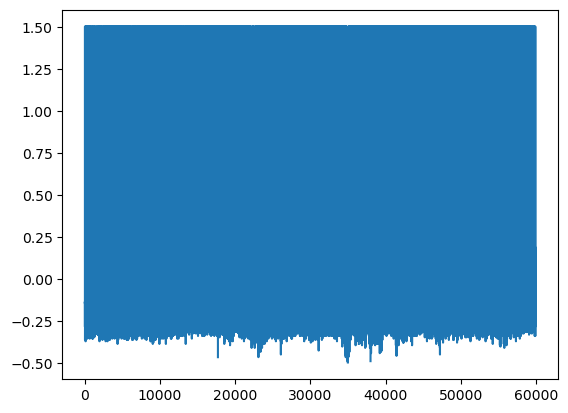

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_ECG = pd.DataFrame({'nilai_sig': sig[0]})

# Tampilkan plot dari sig[0]
plt.plot(df_ECG['nilai_sig'])
# plt.xlim(9000,20000)
plt.show()

# Opsional: Simpan dataframe ke dalam file CSV jika diperlukan
# df.to_csv('sig_data.csv', index=False)


In [182]:
ECG_sig = sig[0]
len(ECG_sig)

60000

In [183]:
ECG_sig

array([-0.14173228, -0.14173228, -0.14173228, ..., -0.1023622 ,
       -0.1023622 , -0.1023622 ])

In [184]:
df_ECG = pd.DataFrame(ECG_sig)
df_ECG = df_ECG.transpose()
df_ECG.to_csv('C:/Users/aimedic/PycharmProjects/ecg_Project/mimic-iii/'+filename+'.csv')

In [153]:
df_ECG

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.341176,0.34902,0.360784,0.364706,0.372549,0.384314,0.396078,0.403922,0.407843,0.415686,...,1.0,1.0,0.807843,0.458824,0.254902,0.223529,0.262745,0.305882,0.333333,0.352941


*************************************** selesai **********************************

In [70]:
distance_mean_median = []
clean_dataset = []


for f in dataset:
  sig = wfdb.rdrecord(f, sampfrom =  0, sampto = 100000).__dict__['p_signal']
#   sig = wfdb.rdrecord(f)
  sig = np.array(sig).T
  peaks, _ = find_peaks(sig[1], distance=60)
  if (sig[1] == 0).all() :
    pass
  else:

    if (sig[1][peaks]).std() < 10:
        clean_dataset.append(f)
    dist =  abs((sig[1][peaks]).mean() - np.median(sig[1][peaks], axis=None))
    distance_mean_median.append(dist)
#     print("\n ", f)
#     print("="*100)
#     print("\nNilai mean peak: ", (sig[1][peaks]).mean() )
#     print("Nilai median peak: ", np.median(sig[1][peaks], axis=None) )
#     print("Nilai std peak: ", (sig[1][peaks]).std() )

In [71]:
for f in clean_dataset:
    sig = wfdb.rdrecord(f, sampfrom =  0, sampto = 100000).__dict__['p_signal']
#     sig = wfdb.rdrecord(f).__dict__['p_signal']
    sig = np.array(sig).T
    peaks, _ = find_peaks(sig[2], distance=60)
    bottom, _ = find_peaks(-sig[2], distance=60)
  
    fig = make_subplots(rows=2, cols=1,
                          subplot_titles=( "PPG", "ABP"))


    fig.append_trace(go.Scatter(
        y=sig[2], name="PPG"
    ), row=1, col=1)


    fig.append_trace(go.Scatter(
        y=sig[1], name="ABP"
    ), row=2, col=1)
    
    fig.add_trace(go.Scatter(
        y=[sig[1][j] for j in peaks ],
        x=peaks, mode='markers', marker_symbol='x-dot',
        marker={'size':10},
    ), row=2, col=1)

    fig.add_trace(go.Scatter(
        y=[sig[1][j] for j in bottom ],
        x=bottom, mode='markers', marker_symbol='x-dot',
        marker={'size':10,
                'color' : 'LightSkyBlue'},
    ), row=2, col=1)

 
    fig.update_layout(height=800, width=800, title_text=f)
    fig.show()


In [76]:
#clean_dataset #struktur path
#ambil kedua dari kanan
patient = []
for patient_1 in (clean_dataset): #zip :dua list digabung jadi satu
    simpan_patient = patient_1.split('/')
    data_split = simpan_patient[7]
    patient.append(data_split)
#1.pisahin string
#2. pake split
#gimana cara ngeekstrak string kedua dari tengah

In [77]:
patient

[]

In [23]:
!pip install py-ecg-detectors

  Using cached py_ecg_detectors-1.3.4-py3-none-any.whl (25 kB)
  Using cached gatspy-0.3-py3-none-any.whl


In [57]:
## import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from ecgdetectors import Detectors
from scipy.signal import  lfilter, cheby2

fs = 125
PPG_SBP = []
PPG_DBP = []
PPG = []
ABP = []
index = 0
hasil_list_PPG = []
table_signal = pd.DataFrame()
signal_sbp_dbp = []
SBP = []
DBP = []
average_SBP = []
average_DBP = []
detectors = Detectors (fs)
lowcut = 0.5
highcut = 10
PPG = []
PPG_filter = []



for f, p in zip (clean_dataset, data_split):
    data = wfdb.rdrecord(f, sampfrom = 0, sampto = 100000).__dict__['p_signal']
    data = np.array(data). T
    sinyal_ABP = data[1]
    sinyal_PPG = data[2]
    sinyal_ECG = data[0]
         

NameError: name 'data_split' is not defined

In [ ]:
sinyal_ECG

In [ ]:
df_ECG = pd.DataFrame(sinyal_ECG)
ECG_horizontal = df_ECG.transpose()
ECG_horizontal
ECG_horizontal.to_csv('D:/ana/ECG-3901254.csv')

In [ ]:
ECG_horizontal

In [ ]:
# ## import pandas as pd
# import numpy as np
# from scipy.signal import find_peaks
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# # from ecgdetectors import Detectors
# from scipy.signal import  lfilter, cheby2

# fs = 125
# PPG_SBP = []
# PPG_DBP = []
# PPG = []
# ABP = []
# index = 0
# hasil_list_PPG = []
# table_signal = pd.DataFrame()
# signal_sbp_dbp = []
# SBP = []
# DBP = []
# average_SBP = []
# average_DBP = []
# detectors = Detectors (fs)
# lowcut = 0.5
# highcut = 10
# PPG = []
# PPG_filter = []



# for f, p in zip (clean_dataset, data_split):
#     data = wfdb.rdrecord(f, sampfrom = 0, sampto = 37500).__dict__['p_signal']
#     data = np.array(data). T
#     sinyal_ABP = data[1]
#     sinyal_PPG = data[2]
# #     sinyal_ECG = data[0]
#     ppg_peaks,_ = find_peaks(sinyal_PPG, distance=60)
    
    
#     start = 0
#     end = 2
    
    
#     for i in range (len(ppg_peaks)-1):
#          #untuk handle error
#          try: 
            
#              PPG.append(sinyal_PPG[ppg_peaks[start]: ppg_peaks[end]])    
#              ABP.append(sinyal_ABP[ppg_peaks[start]: ppg_peaks[end]])
            
#          except IndexError:
             
#              PPG.append(sinyal_PPG[ppg_peaks[start]: ppg_peaks[end-1]])
#              ABP.append(sinyal_ABP[ppg_peaks[start]: ppg_peaks[end-1]])
         
             
#          conv_ABP = np.hstack(ABP)
#          sbp_peaks, _ = find_peaks(conv_ABP, distance =60)
#          dbp_peaks, _ = find_peaks(-conv_ABP, distance = 60) 
            
             
        
#          SBP.append(conv_ABP [sbp_peaks[start]])
#          DBP.append(conv_ABP [dbp_peaks[start]])
        
#          print(start,end)
            
#          start = start+1
#          end = end+1
         

         

In [ ]:
# ## import pandas as pd
# import numpy as np
# from scipy.signal import find_peaks
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# from ecgdetectors import Detectors
# from scipy.signal import  lfilter, cheby2
# from tqdm import tqdm as progressBar

# fs = 125
# PPG_SBP = []
# PPG_DBP = []
# PPG = []
# ABP = []
# index = 0
# hasil_list_PPG = []
# table_signal = pd.DataFrame()
# signal_sbp_dbp = []
# SBP = []
# DBP = []
# average_SBP = []
# average_DBP = []
# detectors = Detectors (fs)
# PPG = []
# PPG_filter = []
# pasien = []
# temp_PPG = []
# temp_SBP = []
# temp_DBP = []



# for f, p in progressBar(zip(clean_dataset, patient)):
# #     print (p)
#     data = wfdb.rdrecord(f, sampfrom = 0, sampto = 3750).__dict__['p_signal']
#     data = np.array(data). T
#     sinyal_ABP = data[1]
#     sinyal_PPG = data[2]
# #     sinyal_ECG = data[0]
#     ppg_peaks,_ = find_peaks(sinyal_PPG, distance=60)
    
    
#     start = 0
#     end = 2
    
    
#     for i in range (len(ppg_peaks)-1):
#         pasien.append(p)
#          #untuk handle error
#         try: 
            
#             PPG.append(sinyal_PPG[ppg_peaks[start]: ppg_peaks[end]])    
#             ABP.append(sinyal_ABP[ppg_peaks[start]: ppg_peaks[end]])
               
                
#         except IndexError:
             
#             PPG.append(sinyal_PPG[ppg_peaks[start]: ppg_peaks[end-1]])
# #             temp_PPG = pd.DataFrame(PPG)
# #             temp_PPG.insert(loc=0, column='patient', value= pasien)
            
            
            
#             ABP.append(sinyal_ABP[ppg_peaks[start]: ppg_peaks[end-1]])
             
             
#         conv_ABP = np.hstack(ABP)
#         sbp_peaks, _ = find_peaks(conv_ABP, distance =60)
#         dbp_peaks, _ = find_peaks(-conv_ABP, distance = 60) 
            
             
        
#         SBP.append(conv_ABP [sbp_peaks[start]])
#         DBP.append(conv_ABP [dbp_peaks[start]])
        
    
            
# #         print(start,end)
            
#         start = start+1
#         end = end+1
            
         


         

In [ ]:
# ######################## BASED ON THE R-R INTERVAL #######################################


# ## import pandas as pd
# import numpy as np
# from scipy.signal import find_peaks
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# from ecgdetectors import Detectors
# from scipy.signal import  lfilter, cheby2

# fs = 125
# PPG_SBP = []
# PPG_DBP = []
# PPG = []
# ABP = []
# ECG = []
# index = 0
# hasil_list_PPG = []
# table_signal = pd.DataFrame()
# signal_sbp_dbp = []
# SBP = []
# DBP = []
# average_SBP = []
# average_DBP = []
# detectors = Detectors (fs)
# lowcut = 0.5
# highcut = 10
# PPG = []
# PPG_filter = []



# for f, p in zip (clean_dataset, data_split):
#     data = wfdb.rdrecord(f, sampfrom = 0, sampto = 37500).__dict__['p_signal']
#     data = np.array(data). T
#     sinyal_ABP = data[1]
#     sinyal_PPG = data[2]
#     sinyal_ECG = data[0]
#     ppg_peaks,_ = find_peaks(sinyal_PPG, distance=60)
    
    
#     start = 0
#     end = 2
    
    
#     for i in range (len(ppg_peaks)-1):
#          #untuk handle error
#          try: 
             
#              PPG.append(sinyal_PPG[ppg_peaks[start]: ppg_peaks[end]])    
#              ECG.append(sinyal_ECG[ppg_peaks[start]: ppg_peaks[end]])
#              ABP.append(sinyal_ABP[ppg_peaks[start]: ppg_peaks[end]])
            
#          except IndexError:
             
#              PPG.append(sinyal_PPG[ppg_peaks[start]: ppg_peaks[end-1]])
#              ECG.append(sinyal_ECG[ppg_peaks[start]: ppg_peaks[end-1]])
#              ABP.append(sinyal_ABP[ppg_peaks[start]: ppg_peaks[end-1]])
         
             
#          conv_ABP = np.hstack(ABP)
#          sbp_peaks, _ = find_peaks(conv_ABP, distance =60)
#          dbp_peaks, _ = find_peaks(-conv_ABP, distance = 60) 
            
             
        
#          SBP.append(conv_ABP [sbp_peaks[start]])
#          DBP.append(conv_ABP [dbp_peaks[start]])
        
#          print(start,end)
            
#          start = start+1
#          end = end+1
         

         

In [ ]:
# plt.plot(ECG [1])
plt.plot(PPG [200])

In [ ]:
from scipy.interpolate import interp1d
hasil_interpolasi_PPG = []
# hasil_interpolasi_ECG = []
Tabel_segmentasi_PPG = pd.DataFrame()
# Tabel_segmentasi_ECG = pd.DataFrame()
Tabel_segmentasi_SBP = pd.DataFrame()
Tabel_segmentasi_DBP = pd.DataFrame()
# PPG_SBP = []

for x in PPG: 
   # print(len(x))
        panjang_interpolasi = np.linspace(0,1,num = 200, endpoint=True)
        PPG_sebelum_interpolasi= np.hstack(x)
#         print(x)
        if (len(PPG_sebelum_interpolasi) < 200) or (len(PPG_sebelum_interpolasi) > 200) :
            x_interp_PPG= np.linspace(0, 1, len(PPG_sebelum_interpolasi))
            f_interp_PPG = interp1d(x_interp_PPG, PPG_sebelum_interpolasi)
            PPG_setelah_interpolasi = f_interp_PPG(panjang_interpolasi)
            hasil_interpolasi_PPG.append(PPG_setelah_interpolasi)
#     print(len(hasil_interpolasi_ECG))
#     else :
#         print('ini salah')
#         print(len(x))
        else:
            PPG_setelah_interpolasi=PPG_sebelum_interpolasi
            hasil_interpolasi_PPG.append(PPG_setelah_interpolasi)
            
# for y in ECG: 
#    # print(len(x))
#         panjang_interpolasi = np.linspace(0,1,num = 200, endpoint=True)
#         ECG_sebelum_interpolasi= np.hstack(x)
# #         print(x)
#         if (len(ECG_sebelum_interpolasi) < 200) or (len(ECG_sebelum_interpolasi) > 200) :
#             x_interp_ECG= np.linspace(0, 1, len(ECG_sebelum_interpolasi))
#             f_interp_ECG = interp1d(x_interp_ECG, ECG_sebelum_interpolasi)
#             ECG_sebelum_interpolasi = f_interp_ECG(panjang_interpolasi)
#             hasil_interpolasi_ECG.append(ECG_sebelum_interpolasi)
# #     print(len(hasil_interpolasi_ECG))
# #     else :
# #         print('ini salah')
# #         print(len(x))
#         else:
#             ECG_setelah_interpolasi=ECG_sebelum_interpolasi
#             hasil_interpolasi_ECG.append(ECG_setelah_interpolasi)
     
    
    
    
temp_PPG = pd.DataFrame(hasil_interpolasi_PPG)
# temp_ECG = pd.DataFrame(hasil_interpolasi_ECG)
temp_SBP = pd.DataFrame(SBP)
temp_DBP = pd.DataFrame(DBP)
Tabel_segmentasi_PPG = pd.concat([Tabel_segmentasi_PPG, temp_PPG], axis = 1, ignore_index = True)
# Tabel_segmentasi_ECG = pd.concat([Tabel_segmentasi_ECG, temp_ECG], axis = 1, ignore_index = True)
Tabel_segmentasi_SBP = pd.concat([Tabel_segmentasi_SBP, temp_SBP], axis = 1, ignore_index = True)
Tabel_segmentasi_DBP = pd.concat([Tabel_segmentasi_DBP, temp_DBP], axis = 1, ignore_index = True)

In [ ]:
#Simpan masing-masing ECG, PPG, SBP, dan DBP

PPG_hasil = temp_PPG
PPG_hasil.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/add pasien excel/indenpendent dataset/test/PPG/3180470.csv')
# ECG_hasil = temp_ECG
# ECG_hasil.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/cek/ECG.csv')
SBP_hasil = temp_SBP
SBP_hasil.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/add pasien excel/indenpendent dataset/test/SBP/3180470.csv')
DBP_hasil = temp_DBP
DBP_hasil.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/add pasien excel/indenpendent dataset/test/DBP/3180470.csv')

In [ ]:


# load_PPG = 'D:/MIMIC III CNN Prediction/Preprocessing/Data/10 pasien/82500/3770478/'
# load_SBP = 'D:/MIMIC III CNN Prediction/Preprocessing/Data/10 pasien/82500/Label/SBP/3770478 200.csv'
# load_DBP = 'D:/MIMIC III CNN Prediction/Preprocessing/Data/10 pasien/82500/Label/DBP/3770478 200.csv'

# # Simpan_PPG.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/10 pasien/82500/PPG/200/train/3770478.csv')


# # Label_train.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/10 pasien/82500/Label/DBP/200/train/3770478.csv')


# # # #80% training
# # Simpan_PPG = Data_PPG.loc[0:831]


# # # #20% testing
# # Simpan_PPG_test = Data_PPG.loc[832:1040]




# def potong(load_path, path_SBP, path_DBP, load=False): 
    
#     if load == True:
        
#         Data_PPG = pd.read_csv(load_path)
#         label_SBP = pd.read_csv(path_SBP)
#         label_DBP = pd.read_csv(path_DBP)
        
#         #return 'data load'
        
#         train_PPG = len(Data_PPG)*0.8
#         train_SBP = len(label_SBP)*0.8
#         train_DBP = len(label_DBP)*0.8
        
        
#     #Save 80% for training

#     Simpan_PPG_train = Data_PPG.loc[0 : train_PPG]
#     Simpan_PPG_train.drop(columns=['Unnamed: 0'])
    
    
#     #Save 20% for testing

#     Simpan_PPG_test = Data_PPG.loc[train_PPG : ]
#     Simpan_PPG_test.drop(columns=['Unnamed: 0'])
    
    
#     save_PPG_train = Simpan_PPG_train.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/CEK/PPG/')
    
#     return label_SBP, Data_PPG
# #     # --------------------
# #     # LABEL Training
# #     # --------------------

# #     Label_train = Label.loc[0:831]
# #     Label_train
    
    
# #     # --------------------
# #     # LABEL Testing
# #     # --------------------

# #     Label_test = Label.loc[832:1040]
# #     Label_test

In [ ]:


load_PPG = 'D:/MIMIC III CNN Prediction/Preprocessing/Data/cek/PPG.csv'
load_ECG = 'D:/MIMIC III CNN Prediction/Preprocessing/Data/cek/ECG.csv'
load_SBP = 'D:/MIMIC III CNN Prediction/Preprocessing/Data/cek/SBP.csv'
load_DBP = 'D:/MIMIC III CNN Prediction/Preprocessing/Data/cek/DBP.csv'

# Simpan_PPG.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/10 pasien/82500/PPG/200/train/3770478.csv')


# Label_train.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/10 pasien/82500/Label/DBP/200/train/3770478.csv')


# # #80% training
# Simpan_PPG = Data_PPG.loc[0:831]


# # #20% testing
# Simpan_PPG_test = Data_PPG.loc[832:1040]




# def potong(load_path_PPG, load_path_ECG, path_SBP, path_DBP, load=False): 
    
# if load == True:

Data_PPG = pd.read_csv(load_PPG)
Data_ECG = pd.read_csv(load_ECG)
label_SBP = pd.read_csv(load_SBP)
label_DBP = pd.read_csv(load_DBP)

#return 'data load'

train_PPG = len(Data_PPG)*0.8
train_ECG = len(Data_ECG)*0.8
train_SBP = len(label_SBP)*0.8
train_DBP = len(label_DBP)*0.8


#Save 80% for training

Simpan_PPG_train = Data_PPG.loc[0 : train_PPG]
Simpan_PPG_train.drop(columns=['Unnamed: 0'])

Simpan_ECG_train = Data_ECG.loc[0 : train_ECG]
Simpan_ECG_train.drop(columns=['Unnamed: 0'])

Simpan_SBP_train = label_SBP.loc[0 : train_SBP]
Simpan_SBP_train.drop(columns=['Unnamed: 0'])

Simpan_DBP_train = label_DBP.loc[0 : train_DBP]
Simpan_DBP_train.drop(columns=['Unnamed: 0'])

save_PPG_train = Simpan_PPG_train.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/cek/potong/train/PPG/pasien-1.csv')
save_ECG_train = Simpan_ECG_train.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/cek/potong/train/ECG/pasien-1.csv')
save_SBP_train = Simpan_SBP_train.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/cek/potong/train/SBP/pasien-1.csv')
save_DBP_train = Simpan_DBP_train.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/cek/potong/train/DBP/pasien-1.csv')
#Save 20% for testing

Simpan_PPG_test = Data_PPG.loc[train_PPG : ]
Simpan_PPG_test.drop(columns=['Unnamed: 0'])

Simpan_ECG_test = Data_ECG.loc[train_ECG : ]
Simpan_ECG_test.drop(columns=['Unnamed: 0'])

Simpan_SBP_test = label_SBP.loc[train_SBP : ]
Simpan_SBP_test.drop(columns=['Unnamed: 0'])

Simpan_DBP_test = label_DBP.loc[train_DBP : ]
Simpan_DBP_test.drop(columns=['Unnamed: 0'])

save_PPG_train = Simpan_PPG_train.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/cek/potong/test/PPG/pasien-1.csv')
save_ECG_train = Simpan_ECG_train.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/cek/potong/test/ECG/pasien-1.csv')
save_SBP_train = Simpan_SBP_train.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/cek/potong/test/SBP/pasien-1.csv')
save_DBP_train = Simpan_DBP_train.to_csv('D:/MIMIC III CNN Prediction/Preprocessing/Data/cek/potong/test/DBP/pasien-1.csv')

#     return label_SBP, Data_PPG
#     # --------------------
#     # LABEL Training
#     # --------------------

#     Label_train = Label.loc[0:831]
#     Label_train


#     # --------------------
#     # LABEL Testing
#     # --------------------

#     Label_test = Label.loc[832:1040]
#     Label_test

In [ ]:
potong(load=True, load_path = load_PPG, path_SBP = load_SBP, path_DBP = load_DBP)

In [ ]:
len(testing)*0.8